Simple Market Basket Analysis using Association Rules/Apriori in Python. Example is from: http://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

In [1]:
#Toy dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

#We have 5 "baskets" or market transactions. We need to convert this to a binary matrix of size 5 x N where
#N is the number of unique items
#Let us explore a few approaches for doing this

In [2]:
import numpy as np
import pandas as pd
unique_items = set([item for transaction in dataset for item in transaction])
number_of_unique_items = len(unique_items)
number_of_unique_items #we have 11 unique items

11

In [3]:
#create a numpy array of size 5 x 11 containing 0s
matrix = np.zeros((len(dataset), number_of_unique_items))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
for transaction_number, basket in enumerate(dataset):
    for item in basket:
        index = list(unique_items).index(item)
        matrix[transaction_number, index] = 1
matrix

array([[1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.]])

In [5]:
#put this into a dataframe
baskets = pd.DataFrame(matrix, columns = list(unique_items))
display(baskets)

,Onion,Kidney Beans,Nutmeg,Eggs,Dill,Milk,Yogurt,Corn,Apple,Ice cream,Unicorn
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
#an easier way to do this......
#You must install mlxtend prior to running this cell
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
 
one_hot = TransactionEncoder()
one_hot_matrix = one_hot.fit_transform(dataset)
print(one_hot_matrix)
df = pd.DataFrame(one_hot_matrix, columns=one_hot.columns_)
df

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [4]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Onion, Eggs)


In [16]:
from mlxtend.frequent_patterns import association_rules
#association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 1.0)
print(rules)

              antecedents            consequents  antecedent support  \
0          (Kidney Beans)                 (Eggs)                 1.0   
1                  (Eggs)         (Kidney Beans)                 0.8   
2                 (Onion)                 (Eggs)                 0.6   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5          (Kidney Beans)                 (Milk)                 1.0   
6          (Kidney Beans)                (Onion)                 1.0   
7                 (Onion)         (Kidney Beans)                 0.6   
8          (Kidney Beans)               (Yogurt)                 1.0   
9                (Yogurt)         (Kidney Beans)                 0.6   
10  (Kidney Beans, Onion)                 (Eggs)                 0.6   
11   (Kidney Beans, Eggs)                (Onion)                 0.8   
12          (Onion, Eggs)         (Kidney Beans)                

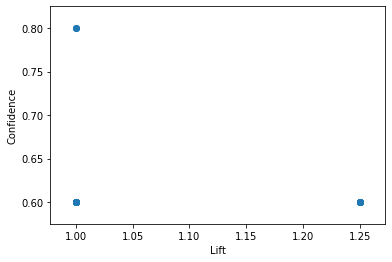

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(rules['lift'],rules['support'])
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [13]:
type(rules)

pandas.core.frame.DataFrame

In [14]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [6]:
rules[rules['antecedents'] == frozenset(['Onion'])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [11]:
rules['lift']

0    1.25
1    1.25
2    1.25
3    1.25
4    1.25
5    1.25
Name: lift, dtype: float64

In [20]:
rules.to_excel("rules.xlsx")